### Test of codes using the Franke function

First import necessary modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
#N.B. MAKE SURE YOU START JUPYTER-NOTEBOOK WHEN NAVIGATING THE FOLDER PROJECT1/test
#OTHERWISE, WON'T BE ABLE TO IMPORT MODULES!!!

#the following line ensures we can import modules from the src/ folder
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)    

import plotting_functions as plotfnc
import franke_fit as ff
import utils

Generation of the dataset:

In [2]:
#this list will be used to loop through different optimization methods
methods = [ff.OLS, ff.Ridge, ff.Lasso]

#seed RNG to reproduce results
np.random.seed(133)

# Make dataset.
Nx_ = 16
Ny_ = 16

#maximum polynomial degree
maxdeg = 12

#generate x,y data from uniform distribution in [0,1]
x__ = np.random.rand(Nx_, 1)
y__ = np.random.rand(Ny_, 1)
x_, y_ = np.meshgrid(x__,y__)
#generate target data adding gaussian noise
z_ = (utils.FrankeFunction(x_, y_) + 0.1*np.random.randn(Nx_,Ny_)).reshape(-1,1)

Study of MSE and $R^2$ score as function of the polynomial degree, using OLS

Running solver with OLS. Degrees: 12.



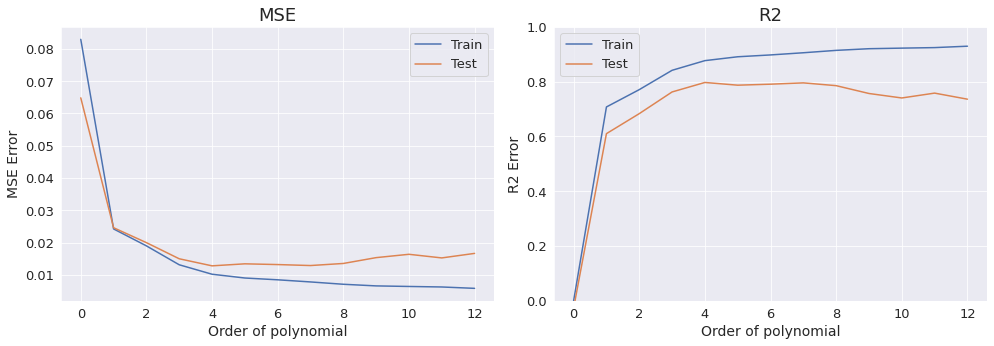

In [5]:
degrees_list, MSE_train_list, MSE_test_list, _, _, _, R2_train_list, R2_test_list, _ \
= ff.Solver(x_, y_, z_, Nx_, Ny_, ff.OLS, lamb = 0, useBootstrap=False, useCrossval=False, maxdegree = maxdeg)

plotfnc.MSE_R2_plot(degrees_list, MSE_train_list, MSE_test_list, R2_train_list, R2_test_list, savefig = True)

Study how the coefficients $\beta_i$ vary when increasing the degree of polynomial 

Running solver with OLS. Degrees: 8.



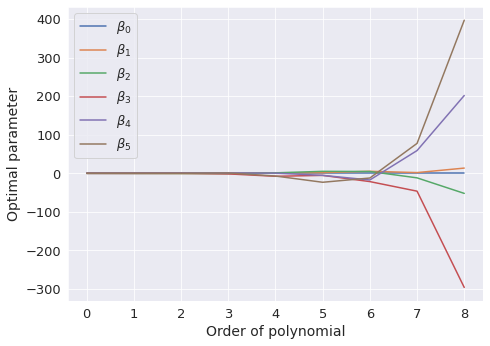

In [4]:
deg_toplot = 1
nr_of_betas = 6
degrees_list, MSE_train_list, MSE_test_list, bias, variance, beta_matrix, _, _, _ = ff.Solver(x_, y_, z_, Nx_, Ny_, ff.OLS, useBootstrap=False, useCrossval=False, lamb=0.0001, maxdegree = maxdeg)
plotfnc.betaval_plot(degrees_list, beta_matrix, nr_of_betas, maxdeg = deg_toplot, title = f"Betavalues_{nr_of_betas}", savefig = True)
plt.show()

Study the bias variance tradeoff, using the bootstrap and fitting using OLS

Running solver with OLS. Degrees: 10.Using bootstrap 



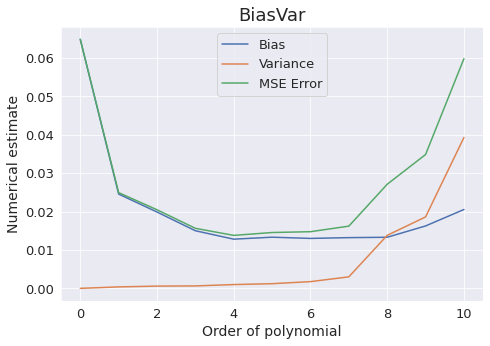

In [10]:
maxdeg_ = 10
degrees_list, MSE_train_list, MSE_test_list, bias, variance, beta_matrix, R2_train_list, R2_test_list, z_pred \
= ff.Solver(x_, y_, z_, Nx_, Ny_, ff.OLS, lamb = 0, useBootstrap=True, useCrossval=False, maxdegree = maxdeg_)
plotfnc.bias_var_plot(degrees_list, bias, variance, MSE_test_list,  savefig = True)


Resampling techniques provide better estimates of $E_{\text{in}}$ (MSE on train set) and $E_{\text{out}}$ (MSE on test set). We next study them as function of the polynomial complexity.

Running solver with OLS. Degrees: 10.Using bootstrap 

Running solver with OLS. Degrees: 10. Using crossvalidation with 5 k-folds.




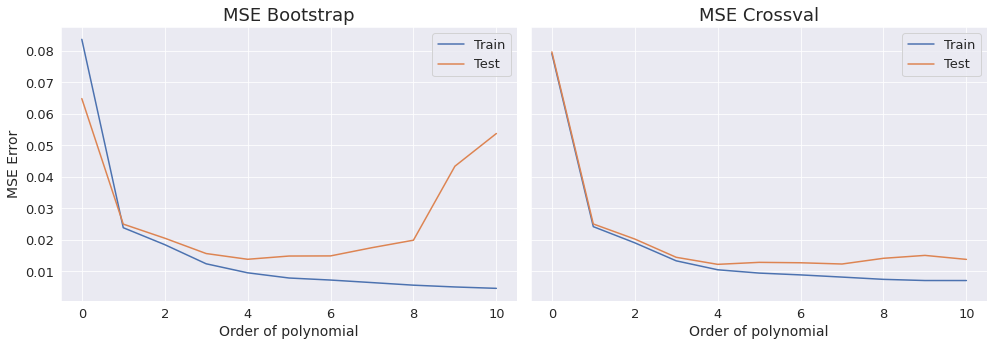

In [13]:
MSE_list_train = []
MSE_list_test = []
titles = ["MSE Bootstrap", "MSE Crossval"]

degrees_list, MSE_tr_boot, MSE_te_boot, _, _, _, _, _, _ \
= ff.Solver(x_, y_, z_, Nx_, Ny_, ff.OLS, lamb = 0, useBootstrap=True, useCrossval=False, maxdegree = maxdeg)
MSE_list_train.append(MSE_tr_boot)
MSE_list_test.append(MSE_te_boot)

degrees_list, MSE_tr_cross, MSE_te_cross, _, _, _, _, _, _ \
= ff.Solver(x_, y_, z_, Nx_, Ny_, ff.OLS, lamb = 0, useBootstrap=False, useCrossval=True, maxdegree = maxdeg)
MSE_list_train.append(MSE_tr_cross)
MSE_list_test.append(MSE_te_cross)

plotfnc.MSE_plot(degrees_list, MSE_list_train, MSE_list_test, titles_ = titles, savename = "bootcross", savefig = True)


Scan a grid of values of $\lambda$, using cross validation to assess the MSE on the test set.
We do it both for Ridge and LASSO regressions.

Running solver with Ridge. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Ridge. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Ridge. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Ridge. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Ridge. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Ridge. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Ridge. Degrees: 13. Using crossvalidation with 5 k-folds.


11


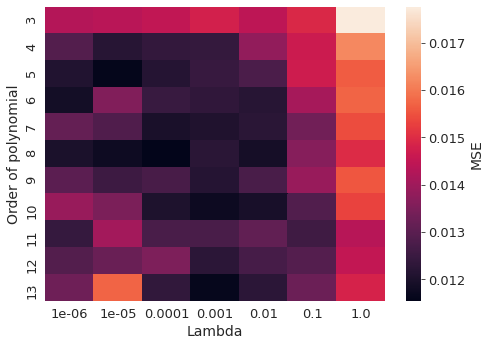

Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11
Running solver with Lasso. Degrees: 13. Using crossvalidation with 5 k-folds.


11


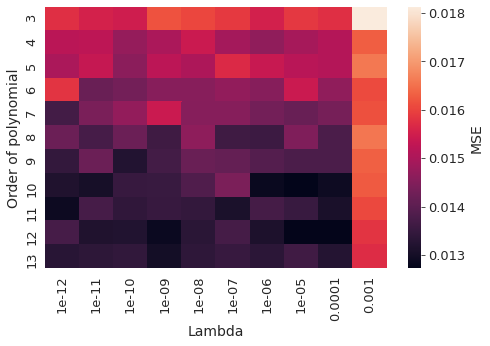

In [28]:
maxdeg = 13
lambda_grids = [np.logspace(-6, 0, 7),np.logspace(-12, -3, 10)]
mindeg = 3

for jj, method in enumerate([ff.Ridge, ff.Lasso]):
    
    MSE_2d = np.zeros(shape=(maxdeg+1-mindeg ,len(lambda_grids[jj]) ) )
    #Fill array with MSE values. x-axis lambda, y-axis degree
    for i in range(len(lambda_grids[jj])):
        degrees_list, MSE_train_list, MSE_test_list, _, _, _, _, _, _ = \
        ff.Solver(x_, y_, z_, Nx_, Ny_, method, useBootstrap=False, useCrossval=True, lamb=lambda_grids[jj][i], mindegree = mindeg, maxdegree = maxdeg)
        print(len(MSE_test_list))
        for j in range(maxdeg-mindeg+1):
            MSE_2d[j,i] = MSE_test_list[j]

    plotfnc.gridsearch_plot(MSE_2d, lambda_grids[jj], mindeg, maxdeg, savename=f"{method.__name__}_grid", savefig = True)
    plt.show()

Now use bootstrap to study the bias variance tradeoff for different values of $\lambda$

Running solver with Ridge. Degrees: 8.Using bootstrap 

Running solver with Lasso. Degrees: 8.Using bootstrap 

Running solver with Ridge. Degrees: 8.Using bootstrap 

Running solver with Lasso. Degrees: 8.Using bootstrap 

Running solver with Ridge. Degrees: 8.Using bootstrap 

Running solver with Lasso. Degrees: 8.Using bootstrap 



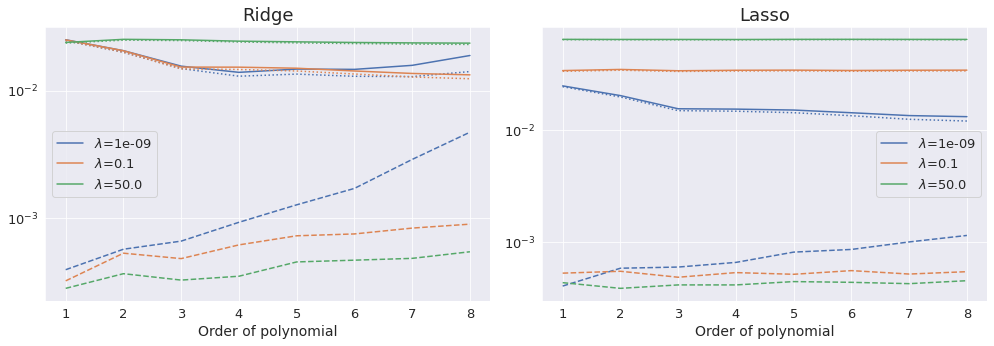

In [3]:
lambda_vals = np.array([1e-9, 1e-1, 50])
lists = [ [], [] ]
mindeg = 1
maxdeg = 8
i = 0

for lambda_ in lambda_vals:
    for jj, method in enumerate([ff.Ridge, ff.Lasso]):
        #print(method)
        #print(type(method))
        degrees_list, MSE_train_list, MSE_test_list, bias, variance, _, _, _, _ = \
        ff.Solver(x_, y_, z_, Nx_, Ny_, method, useBootstrap=True, useCrossval=False, lamb=lambda_, mindegree = mindeg, maxdegree = maxdeg)
        lists[jj].append([MSE_test_list, bias, variance])


plotfnc.bias_var_lambdas(degrees_list, lists, lambda_vals)
plt.show()



In [6]:
lambda_vals

array([1.e-02, 1.e+01, 1.e+04])

In [3]:
plotfnc.bias_var_lambdas(degrees_list, lists, lambda_vals)


NameError: name 'degrees_list' is not defined